In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [6]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

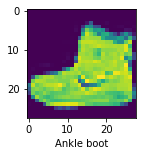

In [8]:
plot_sample(X_train, y_train, 0)

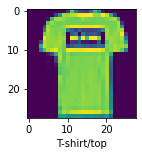

In [9]:
plot_sample(X_train, y_train, 1)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4790 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3204 - accuracy: 0.8835
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2758 - accuracy: 0.8986
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2430 - accuracy: 0.9101
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2197 - accuracy: 0.9193
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1964 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1784 - accuracy: 0.9329
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1660 - accuracy: 0.9371
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1514 - accuracy: 0.9431
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [14]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2843 - accuracy: 0.9069


[0.28426775336265564, 0.9068999886512756]

In [15]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[5.51870656e-08, 1.22706123e-09, 4.03102973e-09, 2.04170064e-07,
        3.61586174e-08, 1.40227594e-05, 4.75277179e-11, 4.14156384e-04,
        7.77329923e-10, 9.99571502e-01],
       [1.03785314e-04, 2.27685405e-12, 9.99806643e-01, 4.58072247e-09,
        4.34466801e-06, 4.24543332e-15, 8.52535013e-05, 2.94058675e-18,
        4.29047457e-11, 1.54382556e-13],
       [1.71705472e-09, 9.99999940e-01, 1.20152993e-11, 6.38551712e-11,
        2.17584609e-12, 2.17340396e-15, 2.00494612e-12, 5.27835657e-25,
        3.43143889e-13, 1.26703787e-17],
       [8.64770833e-09, 9.99999940e-01, 1.61041291e-10, 1.64689384e-09,
        1.56617094e-10, 1.92556593e-15, 1.14924521e-10, 1.35891638e-20,
        2.45180315e-15, 1.34478995e-15],
       [7.93545902e-01, 5.32991908e-06, 5.26534510e-04, 1.90566454e-04,
        6.05023466e-04, 1.40270239e-12, 2.05126539e-01, 3.42139338e-12,
        1.54477930e-10, 3.43942791e-11]], dtype=float32)

In [16]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[9, 2, 1, 1, 0]

In [17]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

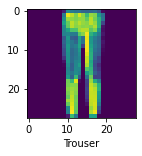

In [18]:
plot_sample(X_test, y_test,3)

In [19]:
classes[y_classes[3]]

'Trouser'

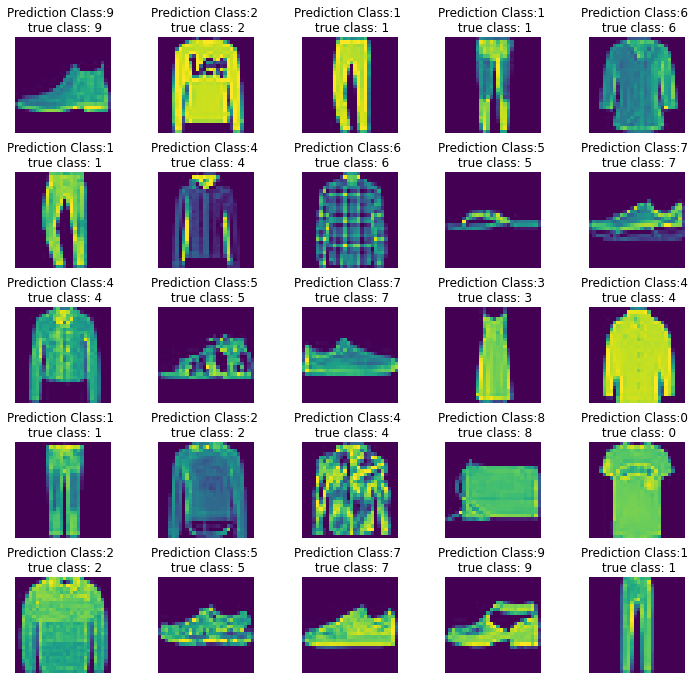

In [23]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(y_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5) 

In [20]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, y_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.81      0.89      0.85      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.92      0.78      0.84      1000
     Class 3       0.91      0.92      0.92      1000
     Class 4       0.84      0.90      0.87      1000
     Class 5       0.98      0.99      0.98      1000
     Class 6       0.72      0.74      0.73      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.99      0.96      0.98      1000
     Class 9       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

